## <center> Boundary Value Problems <center>

### The Shooting method
The shooting methods are developed with the goal of transforming the ODE boundary value problems to an equivalent initial value problems. In the initial value problems, we can start at the initial value and march forward to get the solution. But this method is not working for the boundary value problems, because there are not enough initial value conditions to solve the ODE to get a unique solution. Therefore, the shooting methods was developed to overcome this difficulty.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, solve_bvp
from scipy.optimize import fsolve

**Ex:**

The heat balance for a long thin rod with radiation taken into consideration is given by the equation:
$$\frac{d^2T}{dx^2} -h''(T_a - T)^4 = 0$$

Per unit surface area. The two boundary conditions are given as $T(x = 0) = 40°C$ and $T(x = 10) = 200°C$. Solve for the temperature distribution as a function of $x$ with $h'' = 5x10^{-8}K^{-3}m^{-2}$, $Ta = 20°C$
numerically.

In [2]:
def ode(t, vars):
    T = vars[0]
    T_p = vars[1]

    # Parameters
    h = 5e-8
    Ta = 20

    dTdt = T_p
    dT_pdt = h*(Ta - T)**4

    return[dTdt, dT_pdt]


def func(v0, f=ode):
    # Initial conditions
    vals0 = [40, v0]
    
    
    # Length integration tuple
    x0, xf = 0, 10
    x_tuple = (x0, xf)
    
    sol = solve_ivp(f, x_tuple, y0=vals0, method="RK45")
    y = sol.y[0]

    fun = 200 - y[-1]
    return fun

v0, = fsolve(func, x0=10)
print(v0)

9.294887143280055


c:\Users\Lenovo\anaconda3\lib\site-packages\scipy\integrate\_ivp\base.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y0 = np.asarray(y0)
c:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


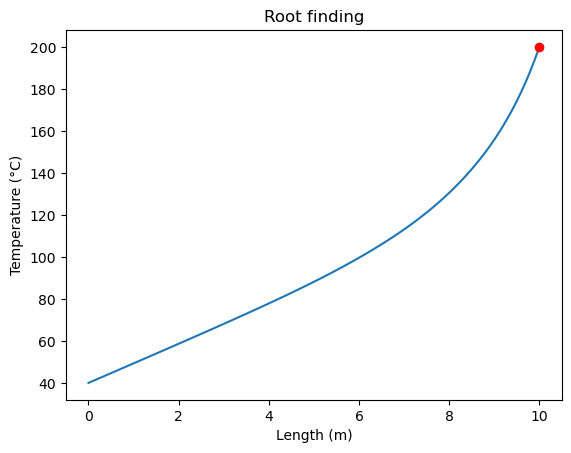

In [3]:
x = np.linspace(0, 10, 100)
x0, xf = 0, 10
x_tuple = (x0, xf)
vals0 = [40, v0]


sol = solve_ivp(ode, x_tuple, y0=vals0, method="RK45", t_eval=x)

plt.plot(sol.t, sol.y[0])
plt.plot(10, 200, 'ro')
plt.xlabel('Length (m)')
plt.ylabel('Temperature (°C)')
plt.title(f'Root finding')
plt.show()


----
### solve_bvp

**Ex:**

Solve the following problem

$$ \frac{d^2T}{dx^2} = - \frac{q_{gen}}{k}$$

With the boundary conditions:

$$ T(0) = T_1$$
$$ -k\frac{dT}{dx}|_{x=n} = \sigma\epsilon(T(n)^4 - T_a^4)$$

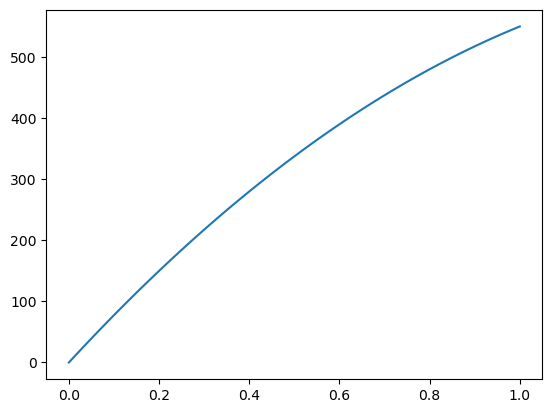

In [4]:
# Define the parameters
sigma = 5.67e-8
epsilon = 0.8
Ta = 500 + 273.15

q_gen = 20000 
k = 40
T1 = 0

L = 1
nodes = 100
x = np.linspace(0,L,nodes)



# Defining the function and the boundary conditions
def fun(x, y):
    f1 = y[1]
    f2 = np.full_like(x, -q_gen/k)

    return np.vstack((f1, f2))

def bc(ya, yb):
    f1 = ya[0] - T1
    f2 = k*yb[1] + sigma*epsilon*(yb[0]**4 - Ta**4)

    return np.array([f1, f2])


y0 = np.zeros((2, nodes))

sol = solve_bvp(fun,bc,x,y0)
T = sol.y[0]
dTdx = sol.y[1]

q = -k*dTdx # Heat flux

plt.plot(x,T)

----
### sympy

In [5]:
import sympy as sym
from sympy.solvers import ode

In [6]:
x = sym.symbols('x') # symbol
u = sym.Function('u') # symbolic function
omega = sym.Symbol('\omega')
eqn = u(x).diff(x).diff(x) + omega**2*u(x) # = 0
eqn

\omega**2*u(x) + Derivative(u(x), (x, 2))

In [7]:
ode.classify_ode(eqn)

('nth_linear_constant_coeff_homogeneous',
 '2nd_power_series_ordinary',
 '2nd_nonlinear_autonomous_conserved',
 '2nd_nonlinear_autonomous_conserved_Integral')

In [8]:
ode.dsolve(eqn, hint='nth_linear_constant_coeff_homogeneous')

Eq(u(x), C1*exp(-I*\omega*x) + C2*exp(I*\omega*x))

In [9]:
f = ode.dsolve(eqn, hint='nth_linear_constant_coeff_homogeneous', ics={u(0): 5, u(1): 1})
f

Eq(u(x), (exp(I*\omega) - 5)*exp(I*\omega*x)/(exp(2*I*\omega) - 1) + (5*exp(2*I*\omega) - exp(I*\omega))*exp(-I*\omega*x)/(exp(2*I*\omega) - 1))

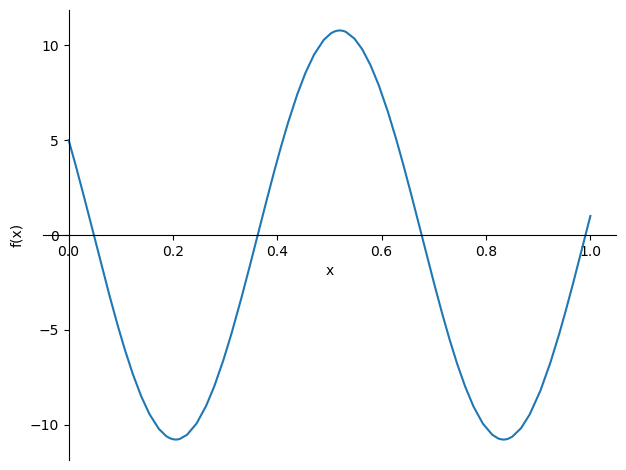

In [10]:
sym.plot(f.rhs.subs(omega, 10), (x, 0, 1))